In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
from matplotlib import cm

# custom package
from icepy.analysis import *
from icepy.splot import *

monthletters = ['J','F','M','A','M','J','J','A','S','O','N','D']
monthstr = ['01','02','03','04','05','06','07','08','09','10','11','12']
monthdict = {1:r'$\mathbf{January}$',
             2:r'$\mathbf{February}$',
             3:r'$\mathbf{March}$',
             4:r'$\mathbf{April}$',
             5:r'$\mathbf{May}$',
             6:r'$\mathbf{June}$',
             7:r'$\mathbf{July}$',
             8:r'$\mathbf{August}$',
             9:r'$\mathbf{September}$',
             10:r'$\mathbf{October}$',
             11:r'$\mathbf{November}$',
             12:r'$\mathbf{December}$'}

In [2]:
method = 'mean'
daterange = (2000,2019)
daterange_clim = (1981,2010)

In [3]:
data_path = "~/sea_ice/data/obs/Had2CIS/sic/1x1/td_hadisst2.2_cis_great_cmc_monthly_cdo360x180_195901_202412_sicn.nc"
grid_path = "~/sea_ice/data/grids/grid_1x1.nc"

# open data
sic = format_time_coord(xr.open_dataset(data_path),'1959-01','2024-12',freq='M')
grid = xr.open_dataset(grid_path)

# calculate SIE and anomalies
sie_Had2CIS = sic_to_sie(sic, grid, lat_bounds=(-90,0), sic_label='sicn', lat_label='lat', lon_label='lon', ensemble=None)
sie_Had2CIS_NH = sic_to_sie(sic, grid, lat_bounds=(0,90), sic_label='sicn', lat_label='lat', lon_label='lon', ensemble=None)
sie_anom_Had2CIS = get_anomalies(sie_Had2CIS,'SIE',ref_period=daterange)
sie_clim_Had2CIS = get_climatology(sie_Had2CIS,var='SIE',ref_period=daterange_clim)

/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:
/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


In [4]:
# CELL TAKES ~1 MINUTE TO RUN

# paths for data
data_path_list = [f"~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m{i}_ens10_sicn.nc" for i in monthstr]

# open SIC data, each file corresponding to a unique INITIALIZATION MONTH
print("Opening data")
sic_CanESM5_init = []
for i,path in enumerate(data_path_list):
    sic = format_time_coord(xr.open_dataset(path),f'1980-{monthstr[i]}',f'202{int(np.heaviside(i,0))}-{monthstr[(i+11)%12]}',freq='M',time_label='reftime')
    sic = sic.rename_dims({'reftime':'time'}).rename_vars({'reftime':'time'}).drop_dims('time_bnd')
    sic_CanESM5_init.append(sic)

# calculate SIE (ensemble mean) and SIE anomalies
print("Calculating SIE")
sie_CanESM5_init = []
for i,sic in enumerate(sic_CanESM5_init):
    print(i)
    sie_CanESM5_init.append(sic_to_sie(sic, grid, lat_bounds=(-90,0), sic_label='SICN', lat_label='lat', lon_label='lon', ensemble='mean', sic_factor=1))
sie_anom_CanESM5_init = [get_anomalies(sie,'SIE',ref_period=daterange) for sie in sie_CanESM5_init]

# add a lead time coordinate to the SIE data set
print("Adding a lead time coordinate")
for i in range(len(sie_CanESM5_init)):
    im = i + 1
    sie_CanESM5_init[i]['lead'] = (sie_CanESM5_init[i]['time.month'] - im)%12
    sie_anom_CanESM5_init[i]['lead'] = (sie_anom_CanESM5_init[i]['time.month'] - im)%12

# re-sort by leadtime
sie_CanESM5_init_lt = [xr.merge([sie_CanESM5_init[im-1].where(sie_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
sie_anom_CanESM5_init_lt = [xr.merge([sie_anom_CanESM5_init[im-1].where(sie_anom_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]

# Calculate climatology
sie_clim_CanESM5_init = [get_climatology(sie,var='SIE',ref_period=daterange_clim) for sie in sie_CanESM5_init_lt]

Opening data
Calculating SIE
0


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


1


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


2


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


3


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


4


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


5


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


6


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


7


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


8


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


9


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


10


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


11


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/code/icepy/analysis.py:117: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  if grid_area.dims == {'lon':360, 'lat':180}:


Adding a lead time coordinate


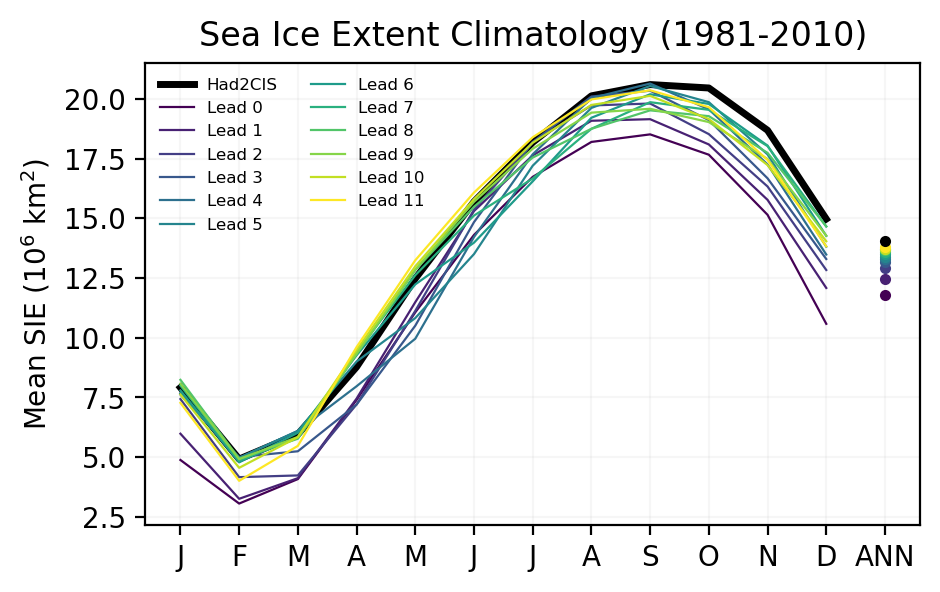

In [5]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = cm.viridis(np.linspace(0,1,12))
labels = ['Had2CIS','Lead 0','Lead 1','Lead 2','Lead 3','Lead 4','Lead 5','Lead 6','Lead 7','Lead 8','Lead 9','Lead 10','Lead 11']

# Plot the data
ax.plot(sie_clim_Had2CIS['SIE'].values,color='black',label="Had2CIS",linewidth=2.5)
for i,data in enumerate(sie_clim_CanESM5_init):
    ax.plot(data['SIE'].values,'-',color=colors[i],label=labels[i+1],linewidth=.8)
for i,data in enumerate(sie_clim_CanESM5_init):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])
ax.plot(12,sie_clim_Had2CIS['overall_mean'].values,'.',color='black')

# Other details of the plots
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title(f"Sea Ice Extent Climatology ({daterange_clim[0]}-{daterange_clim[1]})")
ax.grid(alpha=0.1)
ax.legend(labels,ncols=2,fontsize=6,frameon=False)
plt.show()

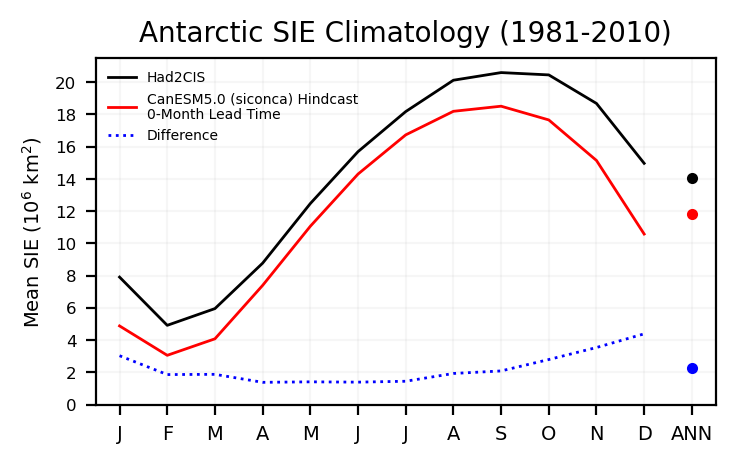

In [26]:
fix,ax=plt.subplots(1,1,figsize=(4,2.25),dpi=200)

# The data to be plotted. Labels for legend are defined in a previous cell.
timeseries = [sie_clim_Had2CIS, sie_clim_CanESM5_init[0], sie_clim_Had2CIS - sie_clim_CanESM5_init[0]]
xticklabels = ['J','F','M','A','M','J','J','A','S','O','N','D','ANN']
colors = ['black', 'red', 'blue', 'purple','darkgrey','grey']
labels = ['Had2CIS','CanESM5.0 (siconca) Hindcast\n0-Month Lead Time','Difference']
linestyles = ['-','-',':']

# Plot the data
for i,data in enumerate(timeseries):
    ax.plot(data['SIE'].values,color=colors[i],label=labels[i],linestyle=linestyles[i],lw=1)
for i,data in enumerate(timeseries):
    ax.plot(12,data['overall_mean'].values,'.',color=colors[i])

# Other details of the plots
ax.set_ylim(0,21.5)
ax.set_yticks(np.arange(0,21,2))
ax.set_yticklabels(np.arange(0,21,2),size=6)
ax.set_xlim(-0.5,12.5)
ax.set_xticks(np.arange(13))
ax.set_xticklabels(xticklabels, size=7)
ax.set_xlabel(None)
ax.set_ylabel(r"Mean SIE ($10^6\ \mathrm{km}^2$)", size=7)
ax.set_title(f"Antarctic SIE Climatology ({daterange_clim[0]}-{daterange_clim[1]})", size=10)
ax.grid(alpha=0.1)
ax.legend(labels,fontsize=5,frameon=False)
plt.show()

In [4]:
# CELL TAKES ~1-2 MINUTES TO RUN

# paths for data
data_path_list = [f"~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m{i}_ens10_sicn.nc" for i in monthstr]

# open data
sic_CanESM5_init = []
for i,path in enumerate(data_path_list):
    print(i, path)
    sic = format_time_coord(xr.open_dataset(path),f'1980-{monthstr[i]}',f'202{int(np.heaviside(i,0))}-{monthstr[(i+11)%12]}',freq='M',time_label='reftime')
    sic = sic.rename_dims({'reftime':'time'}).rename_vars({'reftime':'time'}).drop_dims('time_bnd')
    sic = sic.mean(dim='ensemble')#where(sic['ensemble']==9,drop=True)
    sic_CanESM5_init.append(sic)
grid = xr.open_dataset(grid_path)

# add a lead time coordinate and calculate anomalies
for i in range(len(sic_CanESM5_init)):
    im = i + 1
    sic_CanESM5_init[i] = sic_CanESM5_init[i].assign_coords(lead=(sic_CanESM5_init[i]['time.month'] - im)%12)

# sort by LEAD TIME and SIE, anomalies, climatology.
sic_CanESM5_init_lt = [xr.merge([sic_CanESM5_init[im-1].where(sic_CanESM5_init[im-1]['lead']==lead,drop=True) for im in np.arange(1,13)]) for lead in range(12)]
# climatologies
sic_clim_CanESM5_init = [get_climatology(sic,var='SICN',ref_period=daterange_clim) for sic in sic_CanESM5_init_lt]

0 ~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m01_ens10_sicn.nc


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


1 ~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m02_ens10_sicn.nc


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


2 ~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m03_ens10_sicn.nc


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


3 ~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m04_ens10_sicn.nc


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


4 ~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m05_ens10_sicn.nc


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


5 ~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m06_ens10_sicn.nc


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


6 ~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m07_ens10_sicn.nc


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


7 ~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m08_ens10_sicn.nc


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


8 ~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m09_ens10_sicn.nc


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


9 ~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m10_ens10_sicn.nc


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


10 ~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m11_ens10_sicn.nc


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


11 ~/sea_ice/data/model/CanESM5/init/sic/1x1/old/reint/sf_chfp3b_1x1_1980_m12_ens10_sicn.nc


/space/hall5/sitestore/eccc/crd/ccrn/users/rrp000/miniconda3/envs/icepy/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


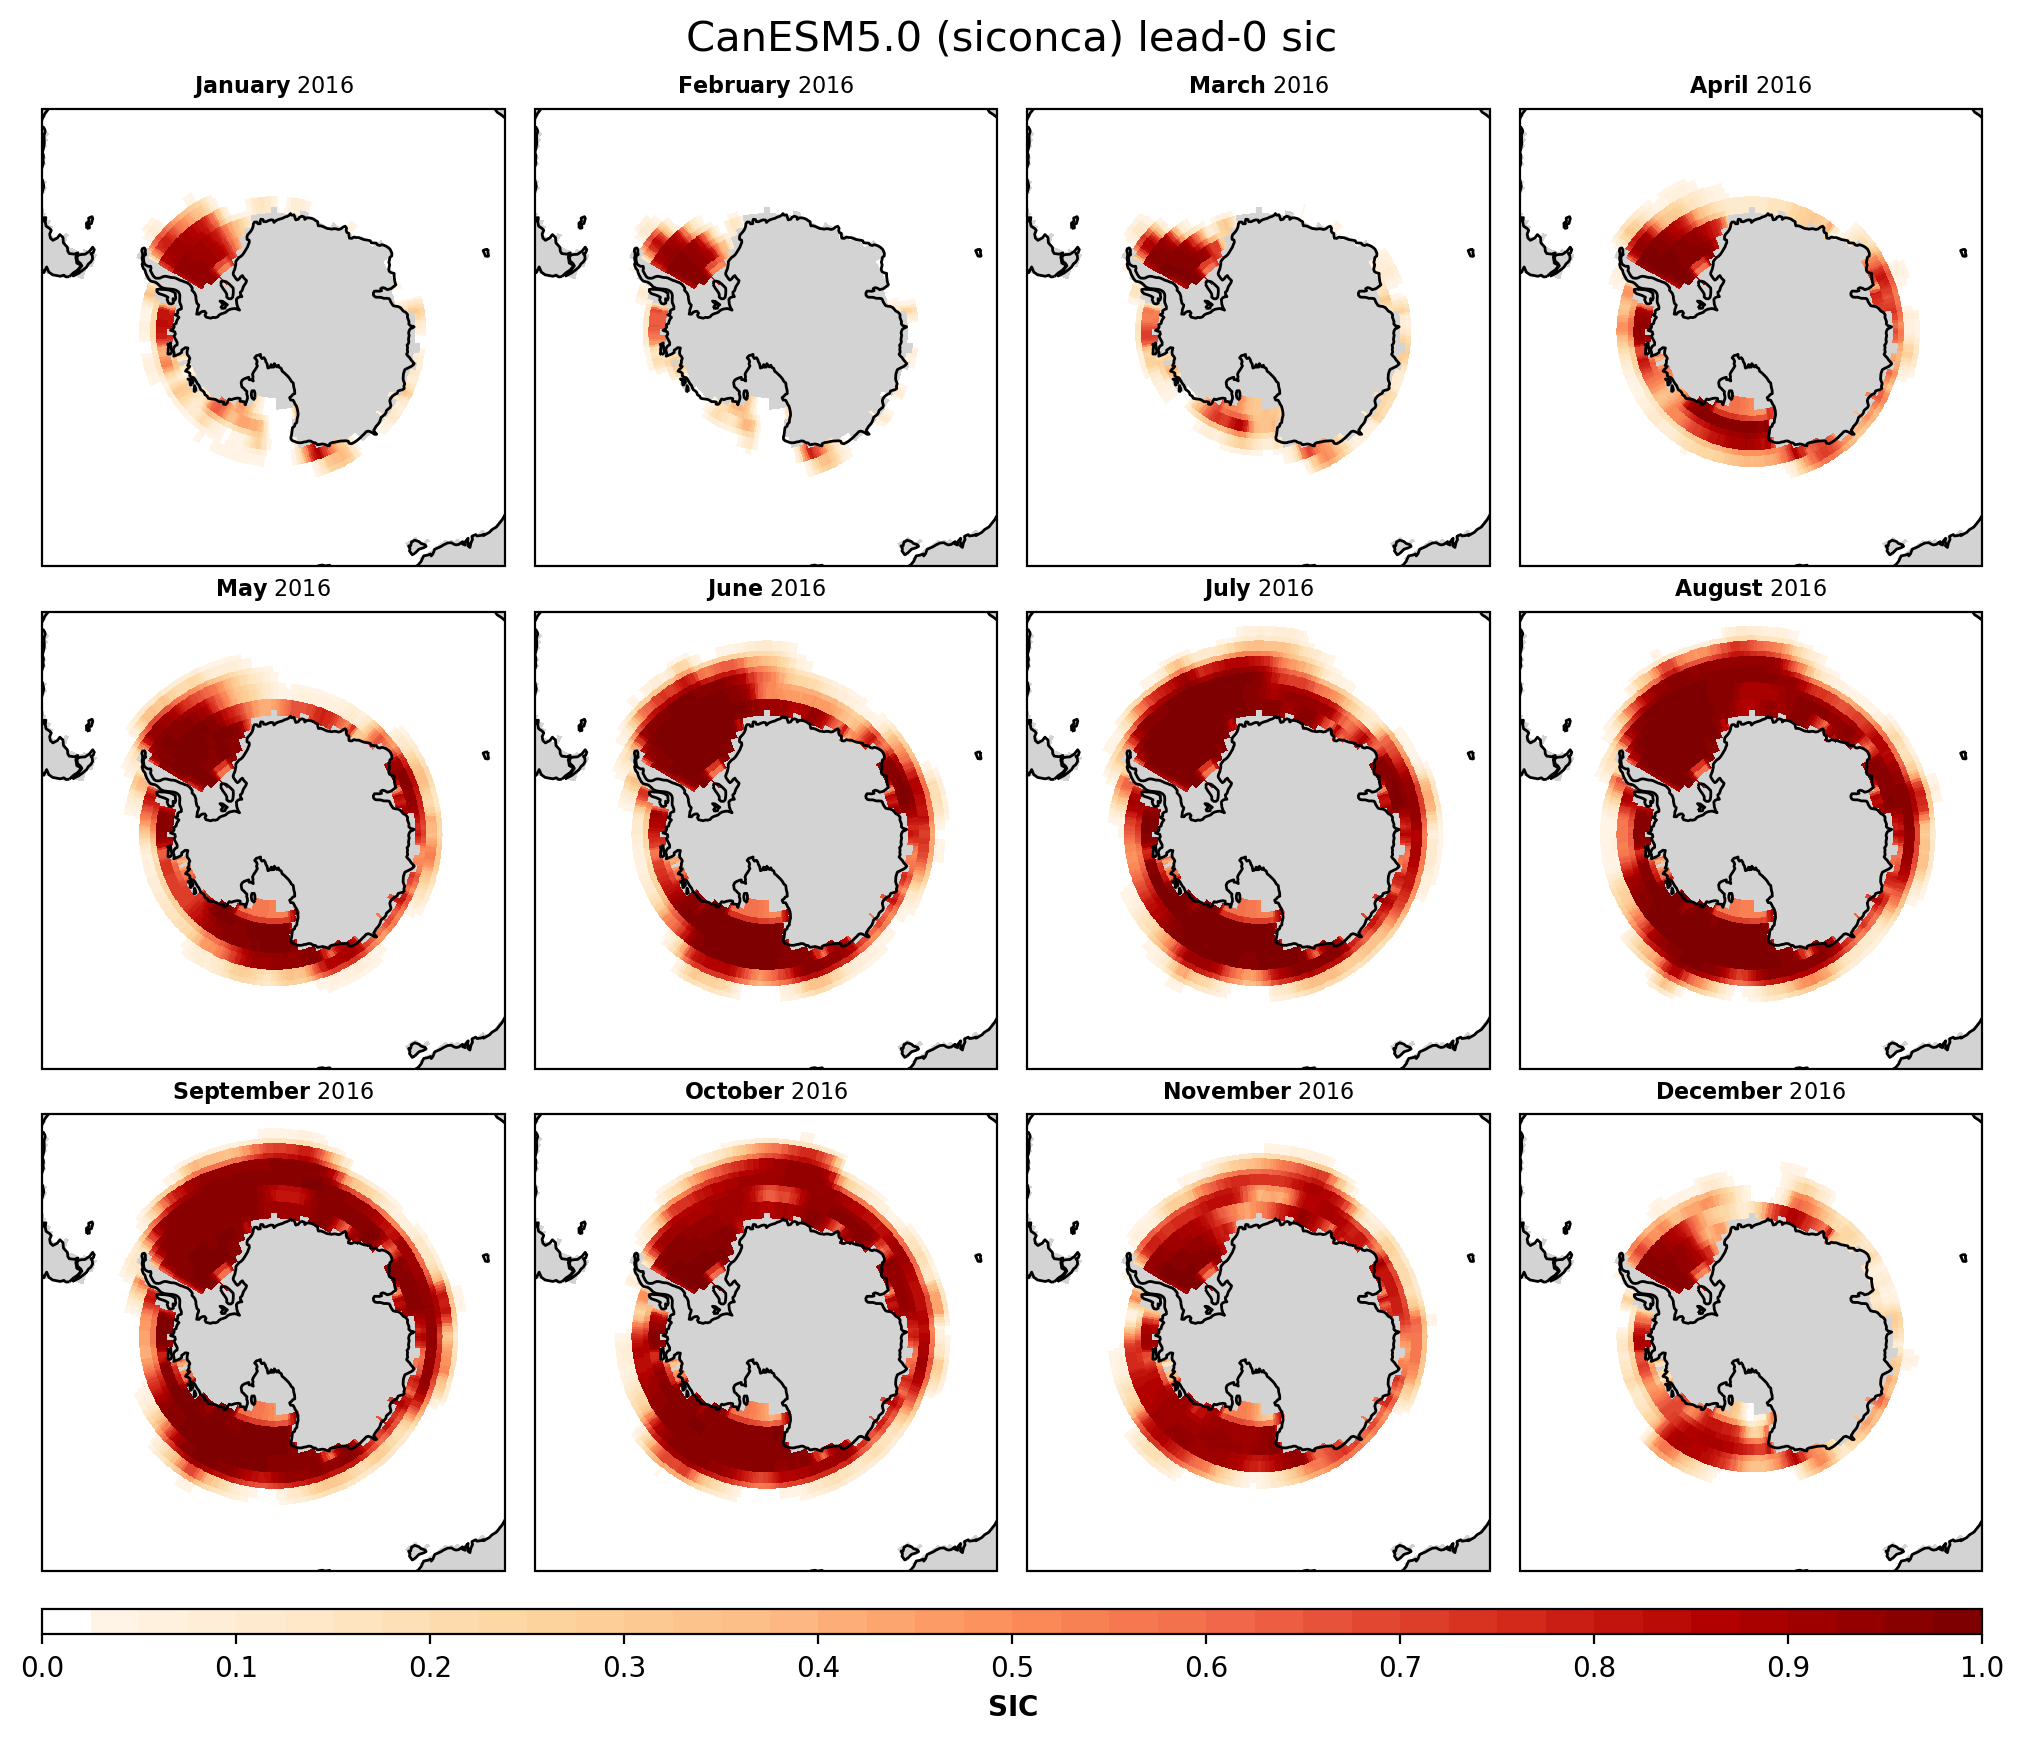

In [7]:
ncols=4
nrows=3
fig, ax = plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,10),facecolor='white',dpi=200,subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90., central_longitude=0.0)})
fig.suptitle("CanESM5.0 (siconca) lead-0 sic", size=15, y=0.95)
get_month = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]

for i in np.arange(ncols):
    for j in np.arange(nrows): 

        month = get_month[j][i]

        set_extent(ax[j][i])
        ax[j][i].coastlines()

        sic_plot = add_sic(ax[j][i], sic_CanESM5_init_lt[0], anom=False, month=month, year=2016)
        sic_plot.set_clim([0., 1.])
        ax[j][i].set_title(f"{monthdict[month]} 2016", size=8)
        
plt.tight_layout()
cticks = np.linspace(0.,1.,11)
cbar = plt.colorbar(sic_plot,ax=ax,aspect=75,shrink=1,ticks=cticks,location='bottom',pad=0.02,label=r"$\mathbf{SIC}$")
plt.show()

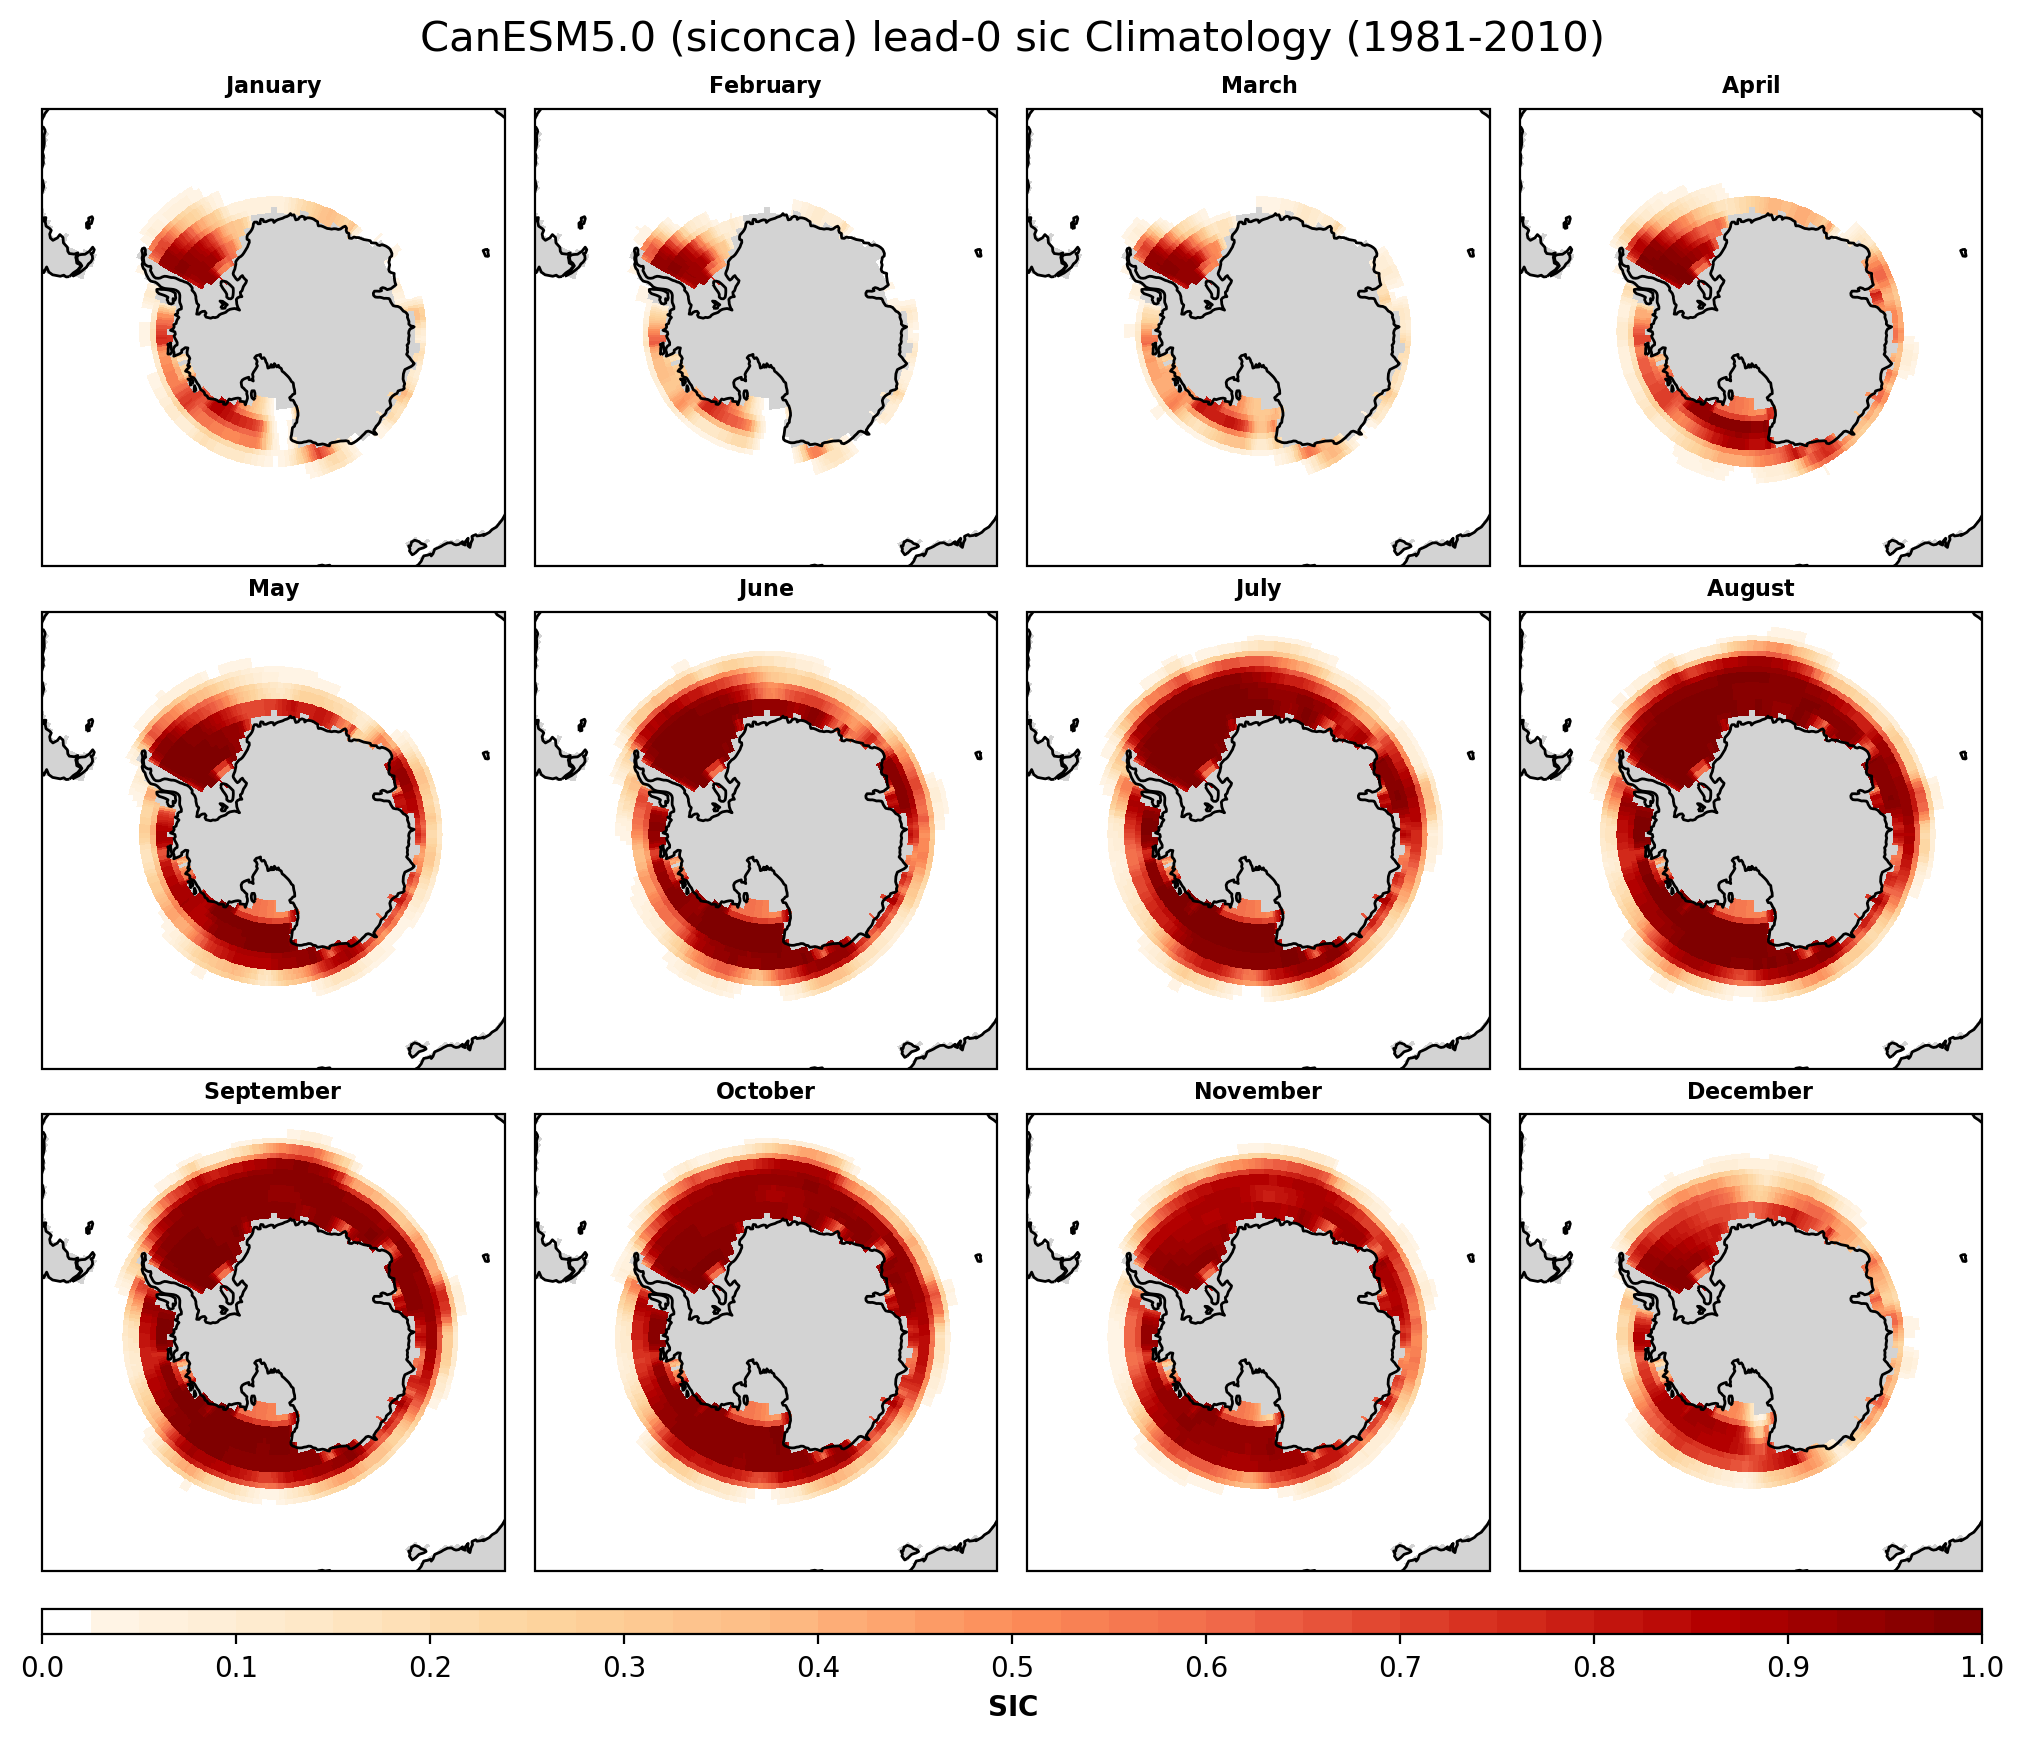

In [8]:
ncols=4
nrows=3
fig, ax = plt.subplots(ncols=ncols,nrows=nrows,figsize=(10,10),facecolor='white',dpi=200,subplot_kw={'projection':ccrs.Orthographic(central_latitude=-90., central_longitude=0.0)})
fig.suptitle("CanESM5.0 (siconca) lead-0 sic Climatology (1981-2010)", size=15, y=0.95)
get_month = [[1,2,3,4],[5,6,7,8],[9,10,11,12]]

for i in np.arange(ncols):
    for j in np.arange(nrows): 

        month = get_month[j][i]

        set_extent(ax[j][i])
        ax[j][i].coastlines()

        # sic_data = sic_CanESM5_init[0]
        # sic_data = sic_data.where((sic_data['time.month']==month) & (sic_data['time.year']==2016),drop=True)
        sic_plot = add_sic(ax[j][i], sic_clim_CanESM5_init[0], anom=False, month=month, year=None)
        sic_plot.set_clim([0., 1.])
        ax[j][i].set_title(f"{monthdict[month]}", size=8)
        
plt.tight_layout()
cticks = np.linspace(0.,1.,11)
cbar = plt.colorbar(sic_plot,ax=ax,aspect=75,shrink=1,ticks=cticks,location='bottom',pad=0.02,label=r"$\mathbf{SIC}$")
plt.show()